In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from utils import get_input

/usr/local/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df = get_input('./data/client_prep.csv')

./data/client_prep.csv: shape = 250000 rows, 63 cols


In [3]:
df.columns, len(df.columns)

(Index(['application_number', 'childrens', 'total_salary', 'amount_credit',
        'amount_annuity', 'region_population', 'age', 'days_on_last_job',
        'own_car_age', 'flag_phone', 'flag_email', 'family_size',
        'external_scoring_rating_1', 'external_scoring_rating_2',
        'external_scoring_rating_3', 'amt_req_credit_bureau_hour',
        'amt_req_credit_bureau_day', 'amt_req_credit_bureau_week',
        'amt_req_credit_bureau_mon', 'amt_req_credit_bureau_qrt',
        'amt_req_credit_bureau_year', 'bki_requests_count', 'bki_kurtosis',
        'external_scoring_prod', 'external_scoring_weighted',
        'external_scoring_rating_min', 'external_scoring_rating_max',
        'external_scoring_rating_mean', 'external_scoring_rating_nanmedian',
        'external_scoring_rating_var', 'ratio_credit_to_annuity',
        'ratio_annuity_to_salary', 'ratio_credit_to_salary',
        'ratio_annuity_to_age', 'ratio_credit_to_age', 'ratio_salary_to_age',
        'ratio_salary_to_exp

In [4]:
df['amount_credit'] = np.log(df['amount_credit'] + 10)
df['amount_annuity'] = np.log(df['amount_annuity'] + 10)
df['days_on_last_job'] = np.log(df['days_on_last_job'] + 100)
df['own_car_age'] = np.log(df['own_car_age'] + 1)
df['amt_req_credit_bureau_mon'] = np.log(df['amt_req_credit_bureau_mon'] + 10)
df['amt_req_credit_bureau_year'] = np.log(df['amt_req_credit_bureau_year'] + 10)
df['expected_total_loss_1'] = np.log(df['expected_total_loss_1'] + 1)
df['expected_total_loss_2'] = np.log(df['expected_total_loss_2'] + 100)
df['expected_total_loss_3'] = np.log(df['expected_total_loss_3'] + 1)
df['expected_monthly_loss_1'] = np.log(df['expected_monthly_loss_1'] + 1)
df['expected_monthly_loss_2'] = np.log(df['expected_monthly_loss_2'] + 10)
df['expected_monthly_loss_3'] = np.log(df['expected_monthly_loss_3'] + 11)

In [5]:
df = df.drop(['ratio_salary_to_experience', 'ratio_credit_to_experience', 'ratio_annuity_to_experience', 'ratio_age_to_experience'], axis=1)

In [6]:
for i, x in enumerate(np.max(df)):
    if x == np.inf:
        col = df.columns[i]
        df[col] = df[df[col] != np.inf][col].min()

In [7]:
df.to_csv('./data/client_prep2.csv', index=False)

In [8]:
# plt.hist(np.log(df['expected_monthly_loss_3'] + 11), bins=25, log=True);

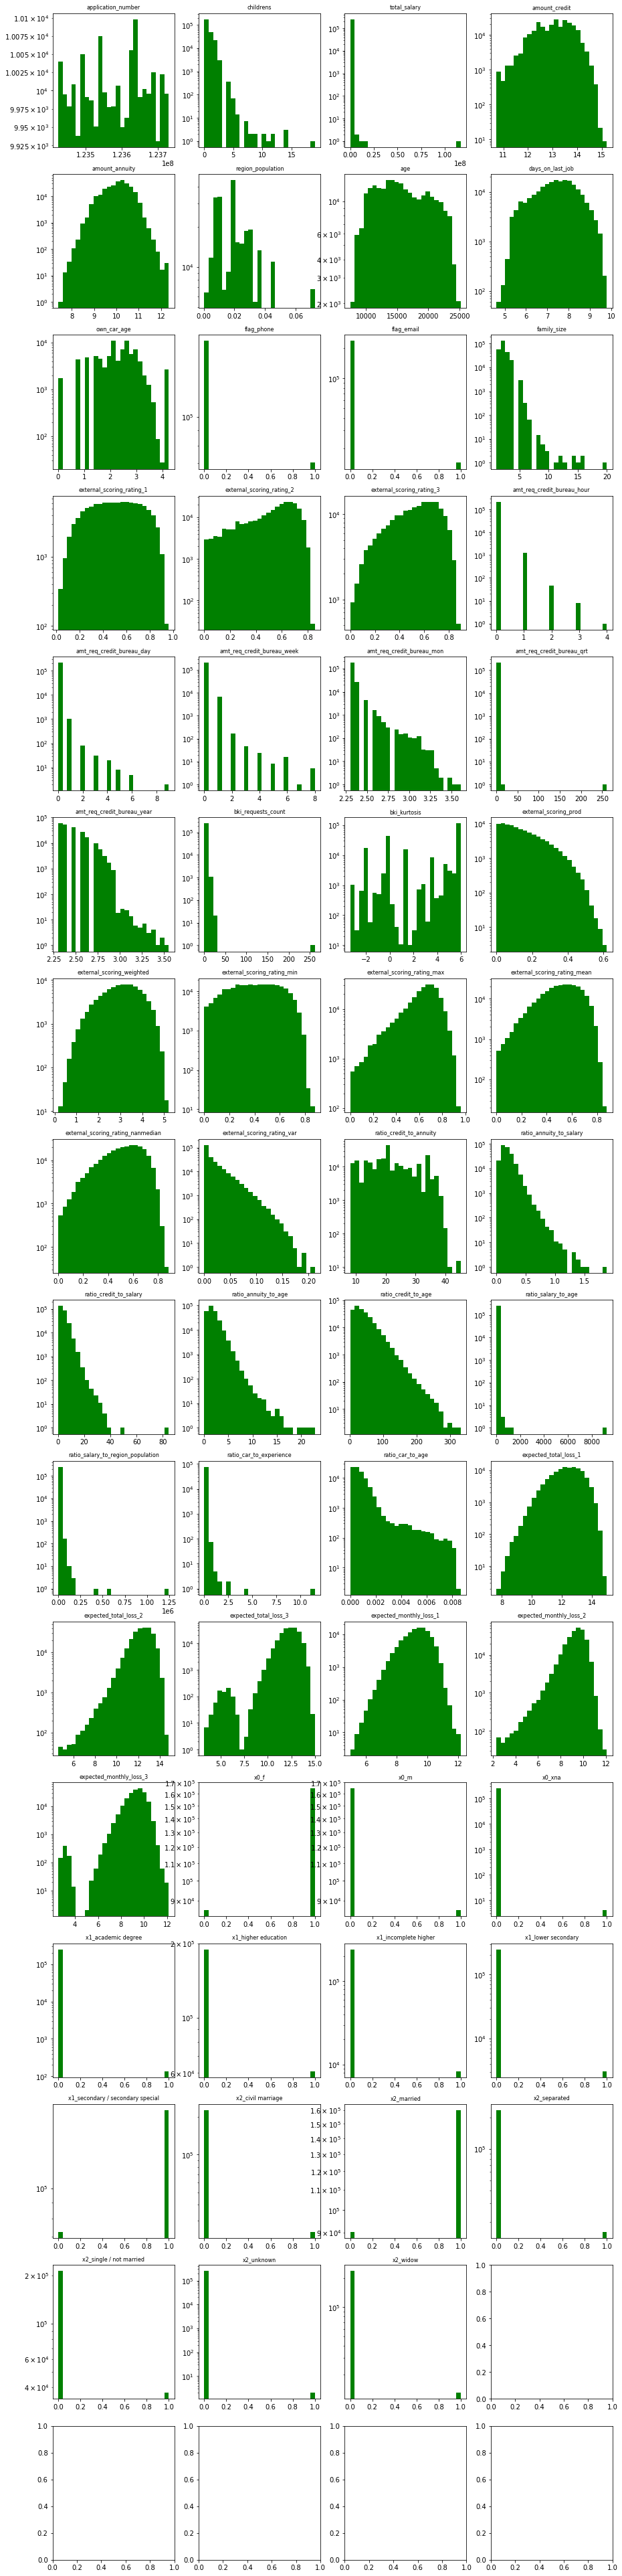

In [9]:
in_line = 4

fig, axes = plt.subplots(16, in_line, figsize=(15, 70))

for num, feature in enumerate(df.columns):
    axes[num//in_line, num%in_line].hist(df[feature].copy(), bins=25, color="green")
    axes[num//in_line, num%in_line].set_yscale('log')
    axes[num//in_line, num%in_line].set_title(feature, fontsize=8)